In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# univariate analysis: 

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

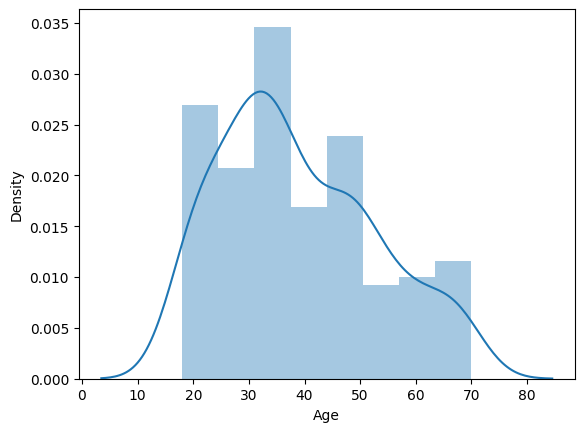

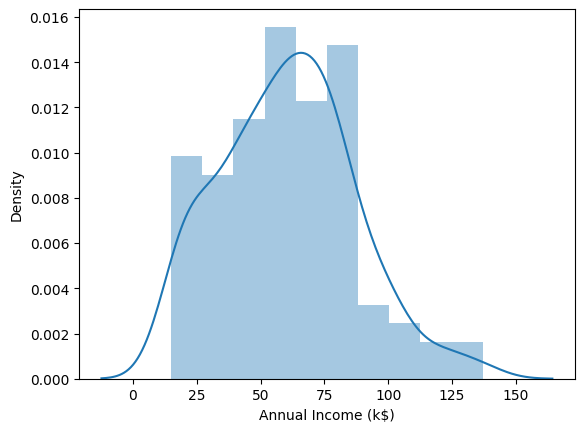

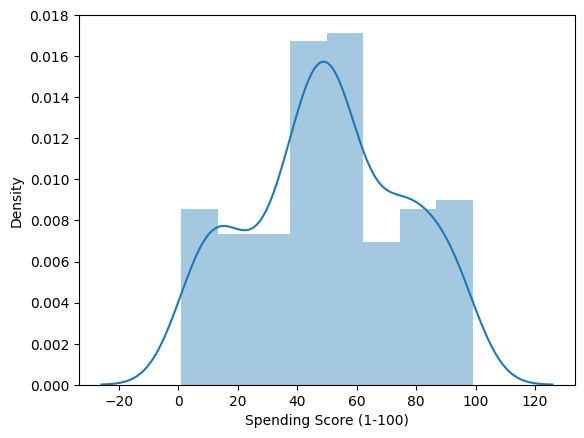

In [7]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

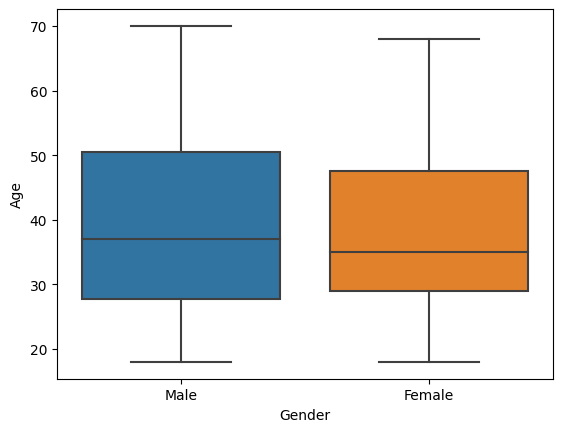

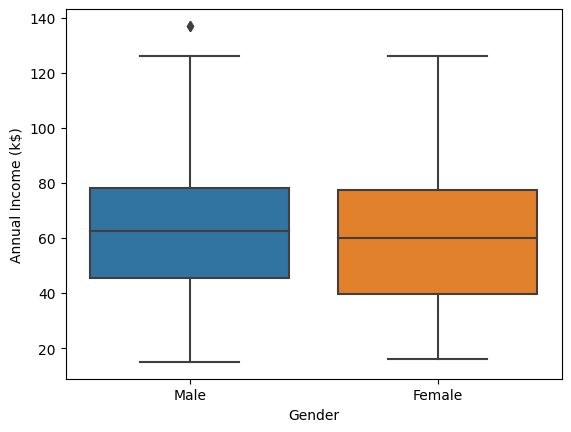

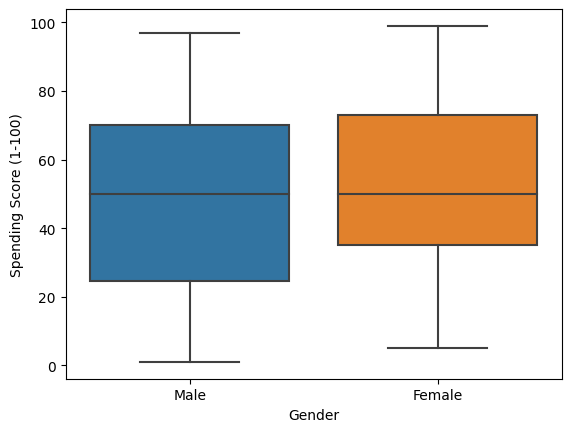

In [8]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender',y=df[i])

### Observations:
- The median for male is higher than female
- The outlier in the Annual income graph brings up the meadian
- Even the median is the same for make and female in the spending score.

# bivariate analysis

In [9]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [10]:
df = df.drop('CustomerID', axis=1)

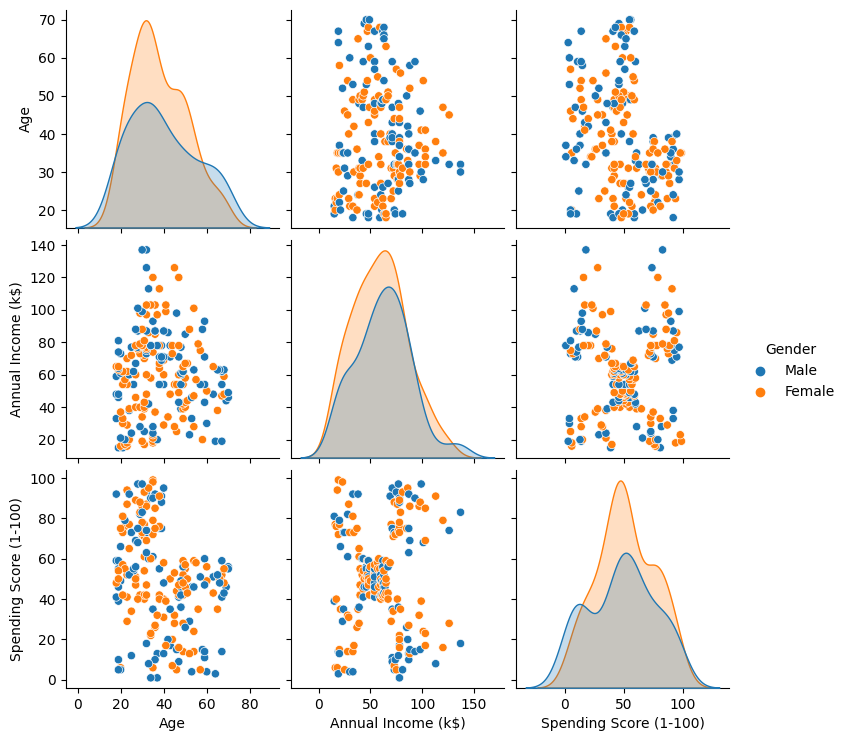

In [11]:
sns.pairplot(data=df, hue='Gender')

In [12]:
# mean values based on gender
df.groupby(['Gender'])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [13]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


### Observations:
- annual income and age are negatively correlated, ie, as age increases, the annual income decreases
- spending score and age are also negatively correlated

<AxesSubplot: >

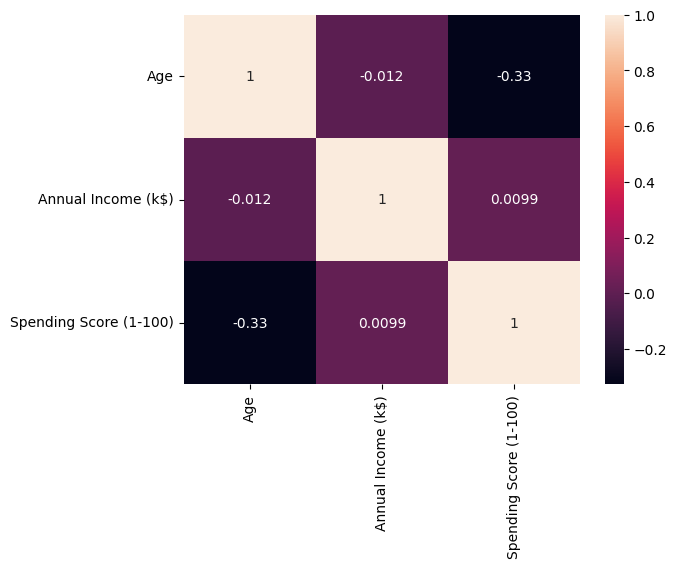

In [14]:
sns.heatmap(df.corr(), annot=True)

# Clustering

In [15]:
#inititating the algorithm
c1 = KMeans()

In [16]:
c1.fit(df[['Annual Income (k$)']])

KMeans()

In [17]:
c1.labels_

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6,
       6, 6], dtype=int32)

In [18]:
# add the clustering lables to the dataFrame
df['Income Cluster'] = c1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,4
1,Male,21,15,81,4
2,Female,20,16,6,4
3,Female,23,16,77,4
4,Female,31,17,40,4


In [19]:
#number of customers in each cluster
df['Income Cluster'].value_counts()

0    42
5    36
4    32
3    28
1    26
7    16
2    14
6     6
Name: Income Cluster, dtype: int64

In [20]:
#elbow method to find the ideal number of clusters
c1.inertia_

2822.4996947496948

In [21]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [22]:
inertia_scores

[137277.28000000003,
 48660.88888888889,
 23528.152173913044,
 13278.112713472485,
 8481.496190476191,
 5081.484660267269,
 3949.2756132756135,
 2827.308424908425,
 2229.5897047397048,
 1763.6207792207792]

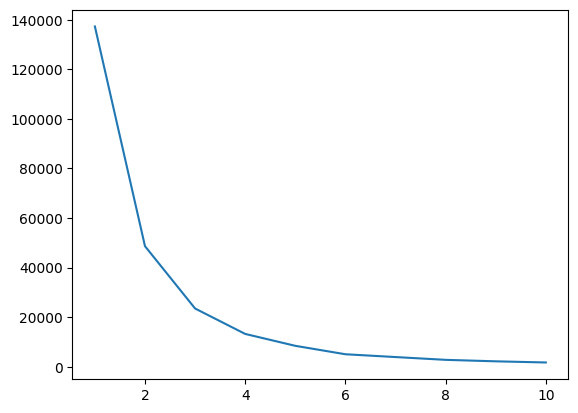

In [23]:
plt.plot(range(1,11),inertia_scores)

### Observation:
- The elbow starts at 3

So we will be taking 3 clusters

In [24]:
c1 = KMeans(n_clusters=3)

In [25]:
c1.fit(df[['Annual Income (k$)']])


KMeans(n_clusters=3)

In [26]:
df['Income Cluster'] = c1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [27]:
df['Income Cluster'].value_counts()

2    90
0    74
1    36
Name: Income Cluster, dtype: int64

In [28]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [29]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,37.833333,99.888889,50.638889
2,38.722222,67.088889,50.000000


### Observations:
- The mean spending score of the first cluster is slightly higher.
- It can be observed that the mean annual income of the first cluster is very high. This exaplins the high spending score.
- The second cluster has the highest mean age, and also the least average income. This falls in line with the observations from the heatmap earlier

# Bivariate clustering

In [30]:
c2 = KMeans()
c2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
c2.labels_
df['Spending and Income cluster'] = c2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income cluster
0,Male,19,15,39,0,4
1,Male,21,15,81,0,3
2,Female,20,16,6,0,4
3,Female,23,16,77,0,3
4,Female,31,17,40,0,4


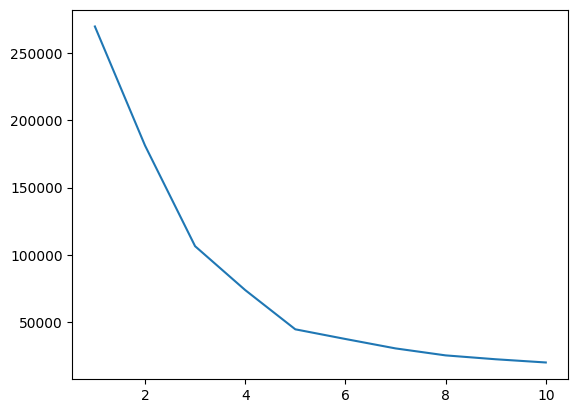

In [31]:
inertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11), inertia_scores2)

### Observation:
- the elbow starts at 5
so we can use 5 clusters

In [32]:
c2 = KMeans(n_clusters = 5)
c2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
c2.labels_
df['Spending and Income cluster'] = c2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income cluster
0,Male,19,15,39,0,1
1,Male,21,15,81,0,3
2,Female,20,16,6,0,1
3,Female,23,16,77,0,3
4,Female,31,17,40,0,1


In [33]:
# Finding the centers of each cluster
centers = pd.DataFrame(c2.cluster_centers_)
centers.columns = ['x', 'y']

<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

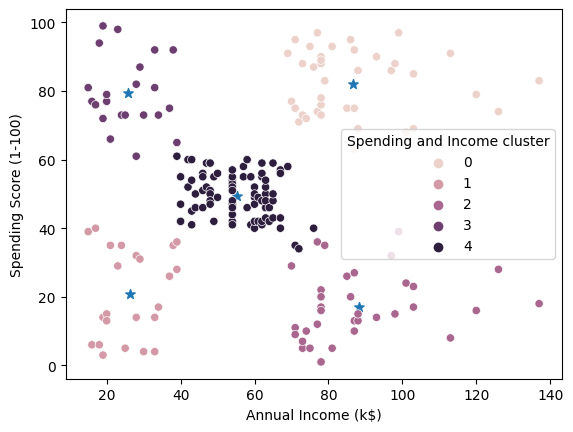

In [34]:
plt.scatter(x=centers['x'], y=centers['y'],s=50, marker='*')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
               hue = 'Spending and Income cluster')

In [35]:
pd.crosstab(df['Spending and Income cluster'], df['Gender'], normalize='index')

Gender,Female,Male
Spending and Income cluster,,
0,0.538462,0.461538
1,0.608696,0.391304
2,0.457143,0.542857
3,0.590909,0.409091
4,0.592593,0.407407


In [36]:
df.groupby('Spending and Income cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income cluster,,,
0,32.692308,86.538462,82.128205
1,45.217391,26.304348,20.913043
2,41.114286,88.200000,17.114286
3,25.272727,25.727273,79.363636
4,42.716049,55.296296,49.518519


- the ideal cluster would be, cluster 1. Because it has customers with high annual income and high spending score. This is the cluster that a company can target for sales.
- Cluster 2, can be people who come once a year, and make large purchases. The campaign for this group will be focused on different items.